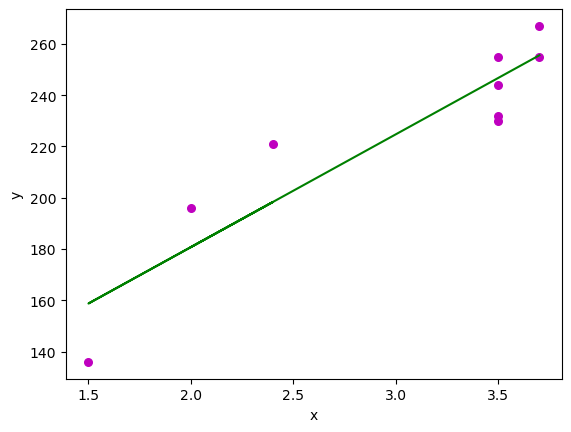

In [5]:

#   [2.0, 2.4, 1.5, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7]
#    [196, 221, 136, 255, 244, 230, 232, 255, 267]
#    tim con so ung voi gia tri 2.4 (Simple Linear Regression)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clor

def Linear_Regress(x: np.ndarray, y: np.ndarray) -> list:
    a = np.mean(x)
    b = np.mean(y)

    SSxy = np.sum((x-a) * (y-b))
    SSxx = np.sum((x-a) ** 2)
    # print("SSxy and SSxx is:", SSxy, SSxx)
    b_1 = SSxy / SSxx
    b_0 = b - b_1 * a

    return b_0, b_1

def plot_resg(x: np.ndarray, y: np.ndarray, b: list):
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    y_pred = b[0] + b[1]*x
 
    plt.plot(x, y_pred, color = "g")
 
    plt.xlabel('x')
    plt.ylabel('y')
 
    plt.show()

def main():
    X = [2.0, 2.4, 1.5, 3.5, 3.5, 3.5, 3.5, 3.7, 3.7]
    Y = [196, 221, 136, 255, 244, 230, 232, 255, 267]
    x = np.array(X)
    y = np.array(Y)
    b = Linear_Regress(x, y)
    plot_resg(x, y, b)

if __name__ == "__main__":
    # trong file object __name__ se luon la __main__
    main() 

value
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.0000e+00 2.9600e+02 1.5300e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 2.0000e+00 2.4200e+02 1.7800e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 2.0000e+00 2.4200e+02 1.7800e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 1.0000e+00 2.7300e+02 2.1000e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 1.0000e+00 2.7300e+02 2.1000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 1.0000e+00 2.7300e+02 2.1000e+01]]
Coefficients:  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.7209056672661756


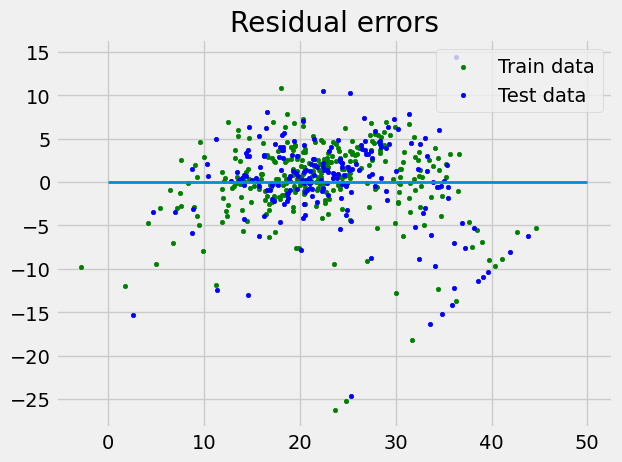

In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model, metrics

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# print(raw_df)
print("value")
print(raw_df.values[::2, :])

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

print('Coefficients: ', reg.coef_)

print('Variance score: {}'.format(reg.score(X_test, y_test)))


plt.style.use('fivethirtyeight')

plt.scatter(reg.predict(X_train),
			reg.predict(X_train) - y_train,
			color="green", s=10,
			label='Train data')

plt.scatter(reg.predict(X_test),
			reg.predict(X_test) - y_test,
			color="blue", s=10,
			label='Test data')

plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

plt.legend(loc='upper right')

plt.title("Residual errors")

plt.show()
